# **Visualization and EDA of Binary & Categorical Variables**

**1. Frequency Table & Density Curve**

**Frequency Table**

Role of Frequency table in Statical modeling,deep learning,NLP,Machine Learning

1)A tabulation of data values that displays the number of times each value or group of values occurs in the dataset.

2)If the data values are members of a continuous quantitative variable, the values are usually grouped into class intervals.

3)Used in the creation of histograms.

4)Also called frequency distribution.


**Density curve:**

Role of Density curve in Statical modeling,deep learning,NLP,Machine Learning

A density curve is a graphical representation of a numerical distribution where the outcomes are continuous. In other words, a density curve is the graph of a continuous distribution.




Datasets:

1)gradedata2.csv

2)smallgradesh.csv

3)axisdata.csv

4)algebradata.csv

5)fdicdata.csv

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pylab as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**DataSet 1: gradedata2.csv**

In [ ]:
gdata=pd.read_csv("/content/gdrive/MyDrive/datasets.zip (Unzipped Files)/datasets/gradedata2.csv")

In [ ]:
gdata.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"7379 Highland Rd. , Dublin, GA 31021"
1,Kadeem,Morrison,male,18,4,4,78.2,"8 Bayport St. , Honolulu, HI 96815"
2,Nash,Powell,male,18,5,9,79.3,"Encino, CA 91316, 3 Lilac Street"
3,Noelani,Wagner,female,14,2,7,83.2,"Riverview, FL 33569, 9998 North Smith Dr."
4,Noelani,Cherry,female,18,4,15,87.4,"97 SE. Ocean Street , Bethlehem, PA 18015"


In [ ]:
binnedPopulation = pd.cut(gdata['grade'], 10)
print(binnedPopulation.value_counts())

(79.6, 86.4]      496
(86.4, 93.2]      436
(72.8, 79.6]      431
(93.2, 100.0]     296
(66.0, 72.8]      250
(59.2, 66.0]       81
(52.4, 59.2]        8
(38.8, 45.6]        1
(31.932, 38.8]      1
(45.6, 52.4]        0
Name: grade, dtype: int64


In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata, binnedPopulation], axis=1)
df = df.sort_values(by='grade')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata': ','.join(subset.fname)
    })
print(pd.DataFrame(groups))

         BinRange  Count                                              gdata
0  (31.932, 38.8]      1                                              Alika
1    (38.8, 45.6]      1                                             Keegan
2    (45.6, 52.4]      0                                                   
3    (52.4, 59.2]      8     Levi,Gail,Jenna,Lacey,Isaiah,Abbot,Linda,Willa
4    (59.2, 66.0]     81  Ciaran,Selma,Xanthus,Fitzgerald,Steven,Chester...
5    (66.0, 72.8]    250  Cara,Amethyst,Preston,Stella,Irma,Keegan,Hardi...
6    (72.8, 79.6]    431  Leila,Curran,Morgan,Penelope,Morgan,Mara,Tasha...
7    (79.6, 86.4]    496  Leonard,Larissa,Carol,Hannah,Neve,Tanek,Buffy,...
8    (86.4, 93.2]    436  Lee,Samuel,Vivian,John,Shad,Wesley,Lewis,Karly...
9   (93.2, 100.0]    296  Armando,Fritz,Bethany,Doris,Eric,Darius,Gannon...


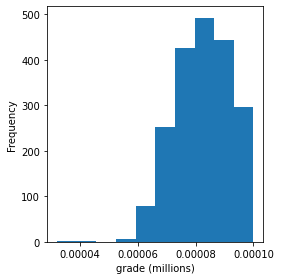

In [ ]:
ax = (gdata['grade'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('grade (millions)')

plt.tight_layout()
plt.show()

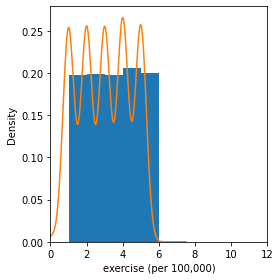

In [ ]:
ax = gdata['exercise'] .plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
gdata['exercise'] .plot.density(ax=ax)
ax.set_xlabel('exercise (per 100,000)')

plt.tight_layout()
plt.show()

**Dataset 2:Smallgrades.csv**

In [ ]:
gdata1=pd.read_csv("/content/gdrive/MyDrive/datasets.zip (Unzipped Files)/datasets/smallgradesh.csv")

In [ ]:
gdata1.head()

,Name,Grade
0,Marcia,82.4
1,Kadeem,78.2
2,Nash,79.3
3,Noelani,83.2
4,Noelani,87.4


In [ ]:
binnedPopulation = pd.cut(gdata1['Grade'], 10)
print(binnedPopulation.value_counts())

(79.6, 86.4]      496
(86.4, 93.2]      436
(72.8, 79.6]      431
(93.2, 100.0]     296
(66.0, 72.8]      250
(59.2, 66.0]       81
(52.4, 59.2]        8
(38.8, 45.6]        1
(31.932, 38.8]      1
(45.6, 52.4]        0
Name: Grade, dtype: int64


In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata1, binnedPopulation], axis=1)
df = df.sort_values(by='Grade')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata1': ','.join(subset.Name)
    })
print(pd.DataFrame(groups))

         BinRange  Count                                             gdata1
0  (31.932, 38.8]      1                                              Alika
1    (38.8, 45.6]      1                                             Keegan
2    (45.6, 52.4]      0                                                   
3    (52.4, 59.2]      8     Levi,Gail,Jenna,Lacey,Isaiah,Abbot,Linda,Willa
4    (59.2, 66.0]     81  Ciaran,Selma,Xanthus,Fitzgerald,Steven,Chester...
5    (66.0, 72.8]    250  Cara,Amethyst,Preston,Stella,Irma,Keegan,Hardi...
6    (72.8, 79.6]    431  Leila,Curran,Morgan,Penelope,Morgan,Mara,Tasha...
7    (79.6, 86.4]    496  Leonard,Larissa,Carol,Hannah,Neve,Tanek,Buffy,...
8    (86.4, 93.2]    436  Lee,Samuel,Vivian,John,Shad,Wesley,Lewis,Karly...
9   (93.2, 100.0]    296  Armando,Fritz,Bethany,Doris,Eric,Darius,Gannon...


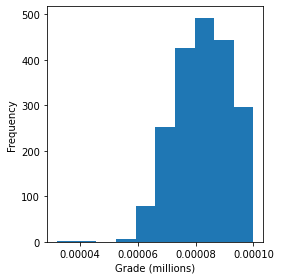

In [ ]:
ax = (gdata1['Grade'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Grade (millions)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


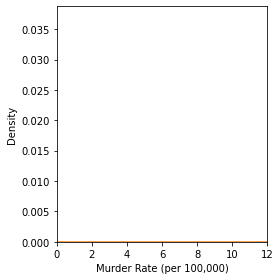

In [ ]:
ax = gdata1['Grade'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
gdata1['Grade'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()


**dataset 3:Axisdata.csv**

In [ ]:
gdata2=pd.read_csv("/content/drive/MyDrive/datasets.zip (Unzipped Files)/datasets/axisdata.csv")

In [ ]:
gdata2.head()

,Fname,Lname,Gender,Hours Worked,SalesTraining,Years Experience,Cars Sold
0,Jada,Walters,F,39,N,3,2
1,Nicole,Henderson,F,46,N,3,6
2,Tanya,Moore,F,42,Y,4,6
3,Ronelle,Jackson,F,38,Y,5,3
4,Brad,Sears,M,33,N,4,2


In [ ]:
binnedPopulation = pd.cut(gdata2['Years Experience'], 10)
print(binnedPopulation.value_counts())

(2.6, 3.0]      212
(1.8, 2.2]      207
(4.6, 5.0]      202
(3.8, 4.2]      195
(0.996, 1.4]    183
(4.2, 4.6]        0
(3.4, 3.8]        0
(3.0, 3.4]        0
(2.2, 2.6]        0
(1.4, 1.8]        0
Name: Years Experience, dtype: int64


In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata1, binnedPopulation], axis=1)
df = df.sort_values(by='Years Experience')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata2': ','.join(subset.Fname)
    })
print(pd.DataFrame(groups))

       BinRange  Count                                             gdata2
0  (0.996, 1.4]    183  Mike,Sam,Roger,John,Tanya,Adam,Tom,Adam,Martin...
1    (1.4, 1.8]      0                                                   
2    (1.8, 2.2]    207  Brad,Roger,Harold,Nicole,Francine,Karen,Nicole...
3    (2.2, 2.6]      0                                                   
4    (2.6, 3.0]    212  Jackie,Larry,Brad,Mary,Onika,Adam,Nicole,Mary,...
5    (3.0, 3.4]      0                                                   
6    (3.4, 3.8]      0                                                   
7    (3.8, 4.2]    195  Oliver,Samantha,Frank,Veronica,Sam,Walter,Pete...
8    (4.2, 4.6]      0                                                   
9    (4.6, 5.0]    202  Carla,Betty,Paula,Adam,Sam,Onika,Martin,Victor...


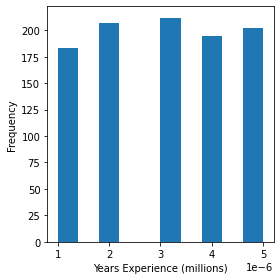

In [ ]:
ax = (gdata2['Years Experience'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Years Experience (millions)')

plt.tight_layout()
plt.show()

Density curve

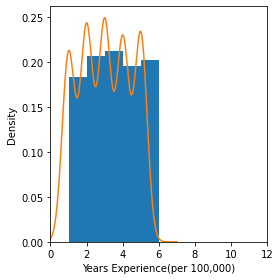

In [ ]:
ax = gdata2['Years Experience'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
gdata2['Years Experience'].plot.density(ax=ax)
ax.set_xlabel('Years Experience(per 100,000)')

plt.tight_layout()
plt.show()

**dataset 4:algebradata.csv**

In [ ]:
gdata4=pd.read_csv("/content/drive/MyDrive/datasets.zip (Unzipped Files)/datasets/algebradata.csv")

In [ ]:
gdata4.head()

,Fname,Lname,Gender,Grade,Hours of Study
0,Mary,Ettienne,F,B,16
1,Charles,Looner,M,F,8
2,Betty,Franklin,F,A,24
3,Roger,Withers,M,C,5
4,John,Mulgrew,M,A,5


In [ ]:
binnedPopulation = pd.cut(gdata4['Hours of Study'], 10)
print(binnedPopulation.value_counts())

(-0.03, 3.0]    127
(9.0, 12.0]     107
(27.0, 30.0]    100
(18.0, 21.0]    100
(24.0, 27.0]     97
(15.0, 18.0]     96
(3.0, 6.0]       96
(21.0, 24.0]     93
(12.0, 15.0]     93
(6.0, 9.0]       90
Name: Hours of Study, dtype: int64


In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata4, binnedPopulation], axis=1)
df = df.sort_values(by='Hours of Study')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata4': ','.join(subset.Fname)
    })
print(pd.DataFrame(groups))

       BinRange  Count                                             gdata4
0  (-0.03, 3.0]    127  india,John,Peter,Carla,Veronica,Frank,Mary,Oli...
1    (3.0, 6.0]     96  Betty,Nicole,Nicole,Onika,Jackie,Denise,Mike,P...
2    (6.0, 9.0]     90  Jada,August,Aaron,Betty,Denise,Francine,Jada,S...
3   (9.0, 12.0]    107  Victor,John,Harold,Veronica,Jack,John,David,On...
4  (12.0, 15.0]     93  Frank,Betty,Brad,Lisa,Karen,india,Jack,Denise,...
5  (15.0, 18.0]     96  Harold,Tanya,Frank,David,Peter,Denise,Nicole,J...
6  (18.0, 21.0]    100  Samantha,Ronelle,John,Charles,Victoria,Mike,Ni...
7  (21.0, 24.0]     93  Mary,Aaron,Mike,Victor,David,Oliver,Mary,Roger...
8  (24.0, 27.0]     97  Tanya,August,Nicole,Karen,Onika,Carla,Paula,On...
9  (27.0, 30.0]    100  Sam,Martin,Carla,John,August,Larry,David,Karen...


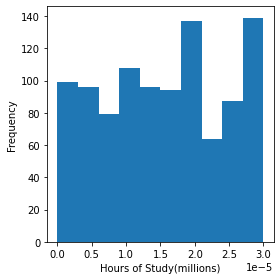

In [ ]:
ax = (gdata4['Hours of Study'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Hours of Study(millions)')

plt.tight_layout()
plt.show()

Density curve

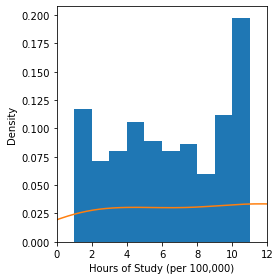

In [ ]:
ax = gdata4['Hours of Study'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
gdata4['Hours of Study'].plot.density(ax=ax)
ax.set_xlabel('Hours of Study (per 100,000)')

plt.tight_layout()
plt.show()

**dataset 5: fdicdata.csv**

In [ ]:
gdata5=pd.read_csv("/content/gdrive/MyDrive/datasets.zip (Unzipped Files)/datasets/fdicdata.csv")

In [ ]:
gdata5.head()

,STNAME,ACTIVE,ADDRESS,ASSET,CITY,NAME,ROA,ROE,WEBADDR,ZIP,FLDOFF,REGION
0,Connecticut,0,22 Main Street,"48,570",Southington,The Southington Bank and Trust Company,NaN,NaN,,6489,Hartford,New York
1,Connecticut,0,81 West Main Street,"624,655",Waterbury,Colonial Bank of Waterbury,NaN,NaN,,6720,Hartford,New York
2,Maine,0,One City Center,"1,699,404",Portland,Fleet Bank of Maine,NaN,NaN,,4104,Concord,New York
3,Maine,0,66 Main Street,"539,169",Ellsworth,Union Trust Company,NaN,NaN,,4605,Concord,New York
4,Maine,0,8 Washington Street,"55,692",Sanford,Northeast Bank of Sanford,NaN,NaN,,4073,Concord,New York


In [ ]:
binnedPopulation = pd.cut(gdata5['ZIP'], 10)
print(binnedPopulation.value_counts())

(70114.3, 80043.2]    4420
(60185.4, 70114.3]    4070
(30398.7, 40327.6]    3614
(50256.5, 60185.4]    3430
(40327.6, 50256.5]    2763
(20469.8, 30398.7]    2331
(512.711, 10540.9]    2031
(89972.1, 99901.0]    1825
(10540.9, 20469.8]    1632
(80043.2, 89972.1]    1482
Name: ZIP, dtype: int64


In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata5, binnedPopulation], axis=1)
df = df.sort_values(by='ZIP')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata5': ','.join(subset.STNAME)
    })
print(pd.DataFrame(groups))

             BinRange  Count                                             gdata5
0  (512.711, 10540.9]   2031  Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...
1  (10540.9, 20469.8]   1632  New York,New York,New York,New York,New York,N...
2  (20469.8, 30398.7]   2331  Maryland,Maryland,Maryland,Maryland,Maryland,M...
3  (30398.7, 40327.6]   3614  Georgia,Georgia,Georgia,Georgia,Georgia,Georgi...
4  (40327.6, 50256.5]   2763  Kentucky,Kentucky,Kentucky,Kentucky,Kentucky,K...
5  (50256.5, 60185.4]   3430  Iowa,Iowa,Iowa,Iowa,Iowa,Iowa,Iowa,Iowa,Iowa,I...
6  (60185.4, 70114.3]   4070  Illinois,Illinois,Illinois,Illinois,Illinois,I...
7  (70114.3, 80043.2]   4420  Louisiana,Louisiana,Louisiana,Louisiana,Louisi...
8  (80043.2, 89972.1]   1482  Colorado,Colorado,Colorado,Colorado,Colorado,C...
9  (89972.1, 99901.0]   1825  California,California,California,California,Ca...


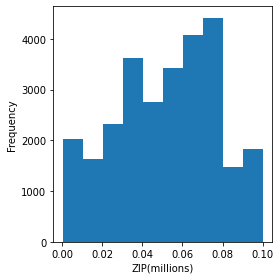

In [ ]:
ax = (gdata5['ZIP'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('ZIP(millions)')

plt.tight_layout()
plt.show()

Density curve

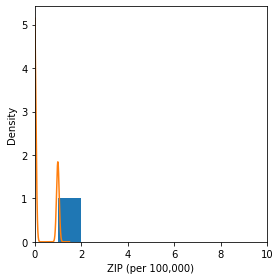

In [ ]:
ax = gdata5['ACTIVE'].plot.hist(density=True, xlim=[0, 10], 
                                    bins=range(1,10), figsize=(4, 4))
gdata5['ACTIVE'].plot.density(ax=ax)
ax.set_xlabel('ZIP (per 100,000)')

plt.tight_layout()
plt.show()

**2. Scatter Plot**

# Demonstration on visualization Scatter plot

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes


In [ ]:
from sklearn import datasets

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
ex1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
ex2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
ex3 = "https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data"
ex4 = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
ex5 = "https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data"

In [ ]:
df1 = pd.read_csv(ex1)
df2 = pd.read_csv(ex2)

data= load_diabetes()
df=pd.DataFrame(data.data, columns=data.feature_names)

df4 = pd.read_csv(ex4)
df5 = pd.read_csv(ex5)

<Figure size 432x288 with 0 Axes>

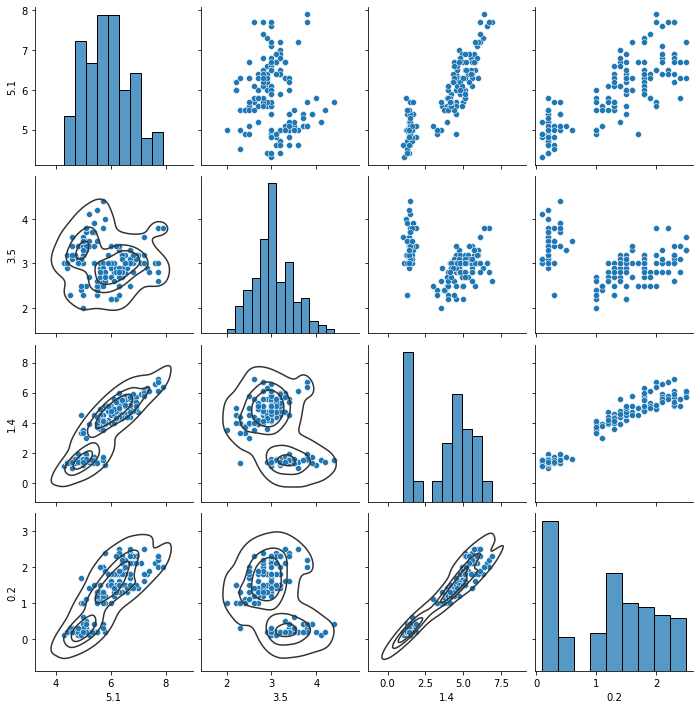

In [ ]:
plt.figure()
g=sns.pairplot(data=df1)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

<Figure size 432x288 with 0 Axes>

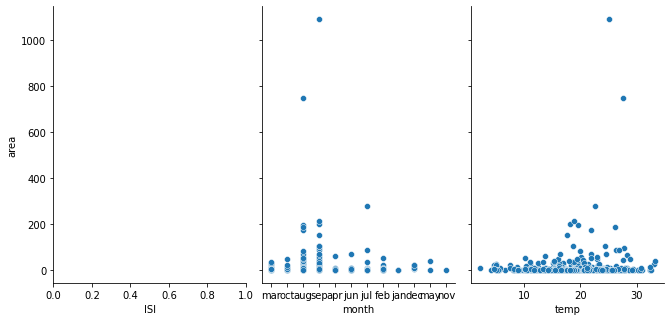

In [ ]:
plt.figure()
sns.pairplot(df2 ,x_vars=['ISI','month','temp'], y_vars='area', height=4.5, aspect=0.7)
plt.show()

<Figure size 432x288 with 0 Axes>

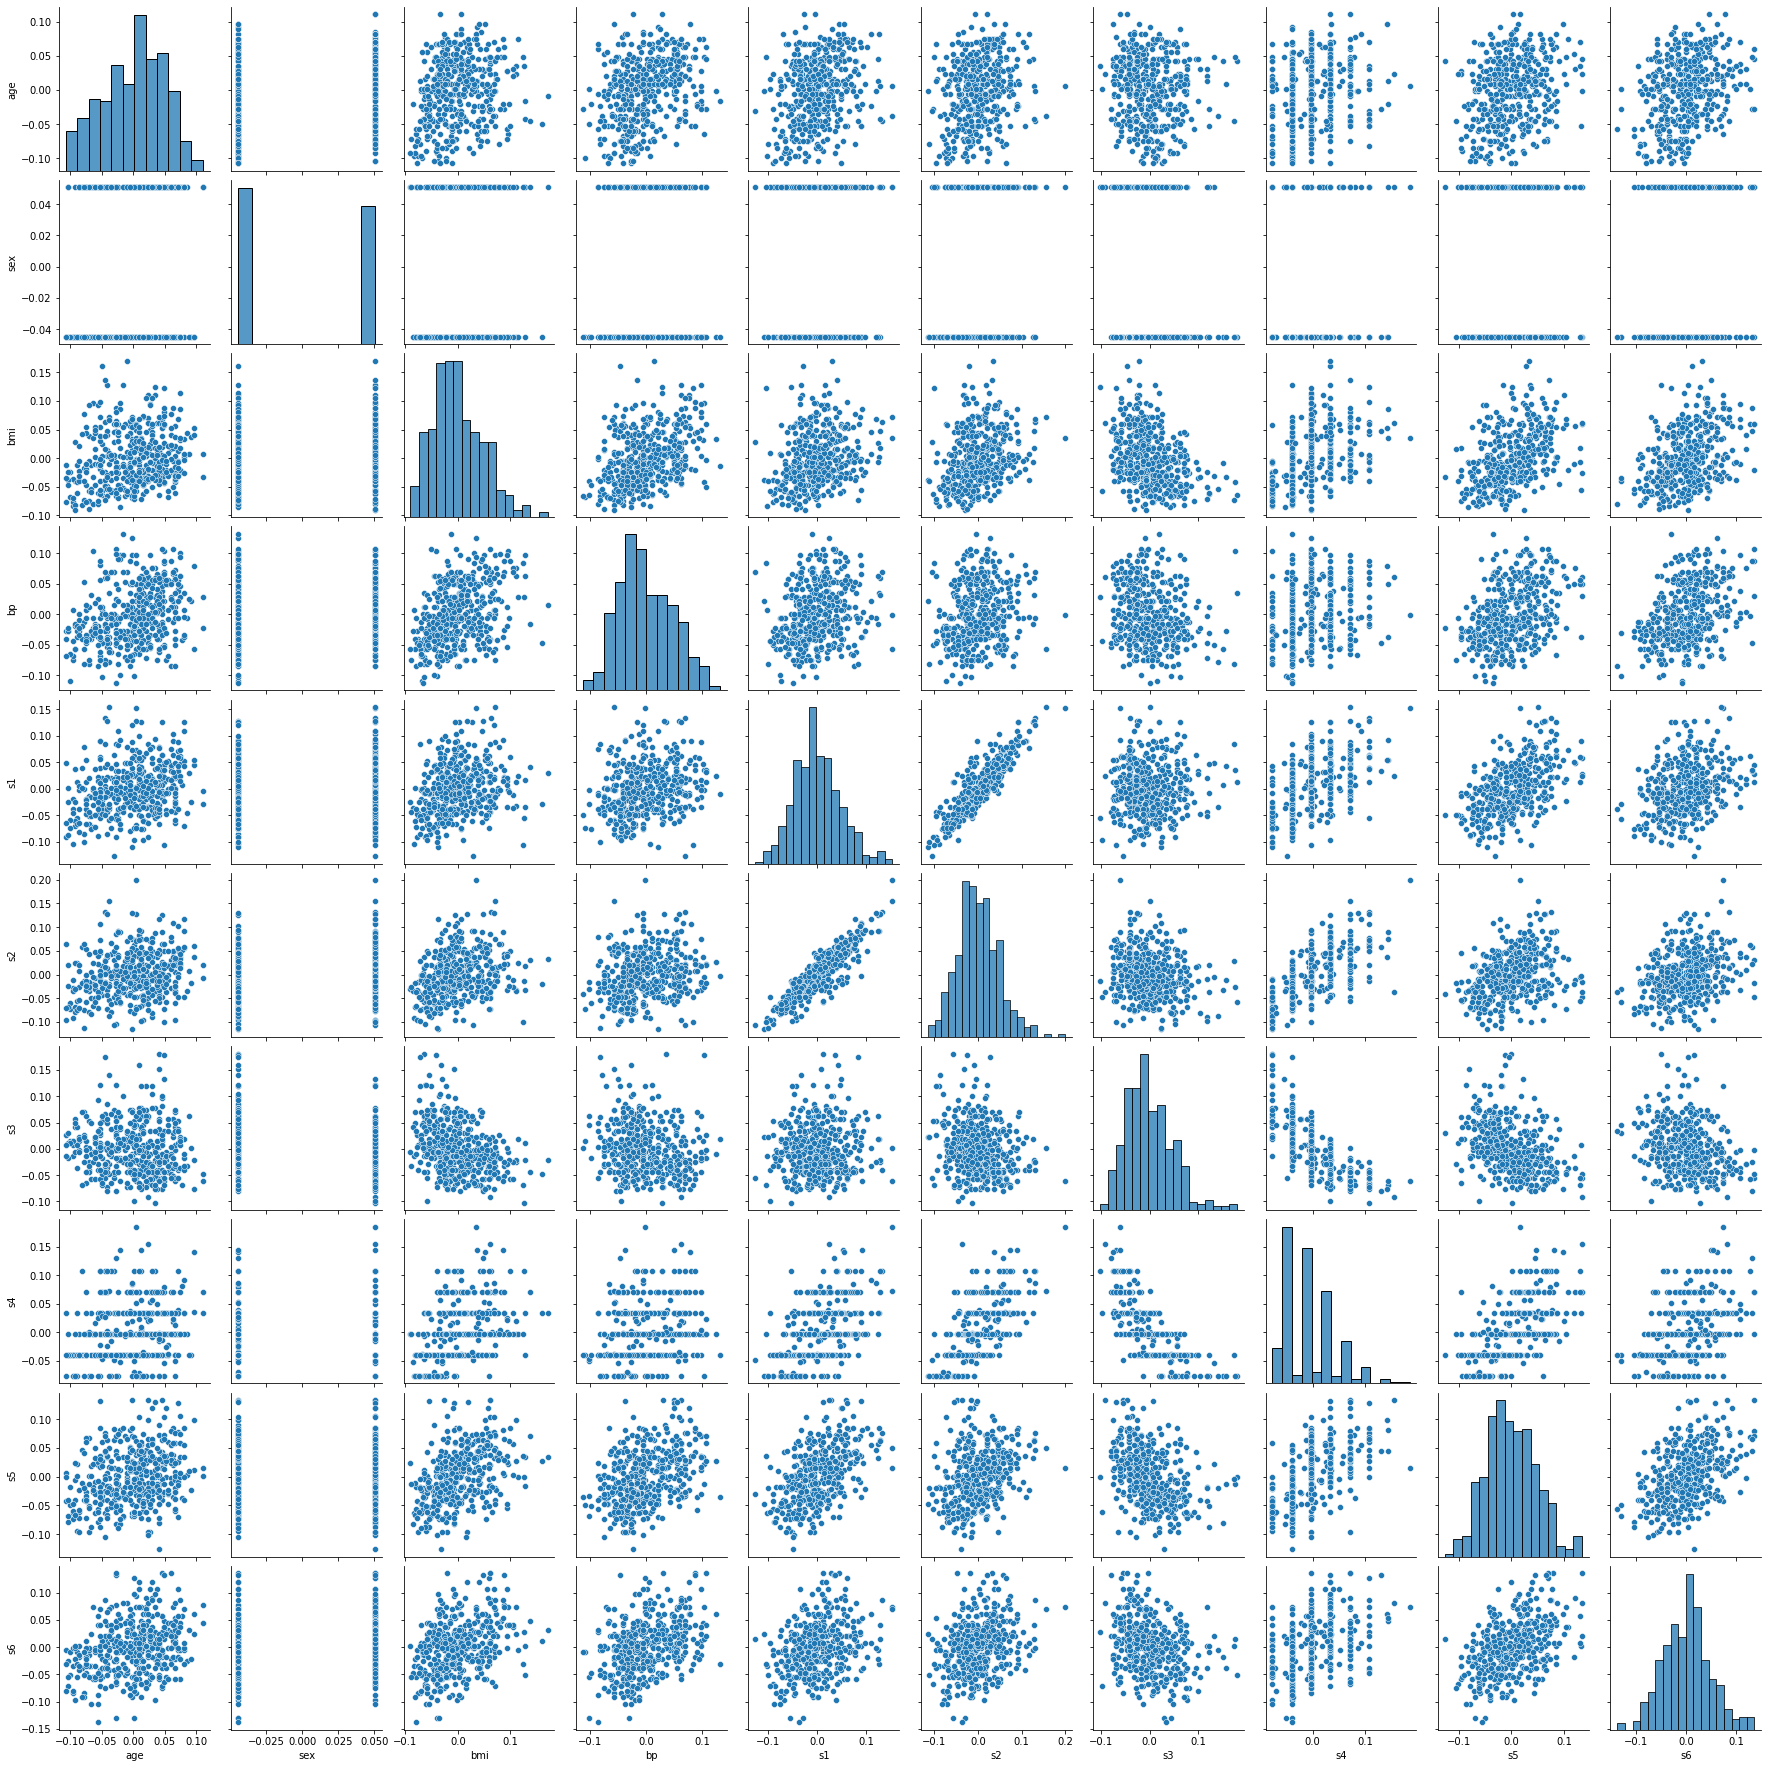

In [ ]:
plt.figure()
sns.pairplot(data=df)
plt.show()

<Figure size 432x288 with 0 Axes>

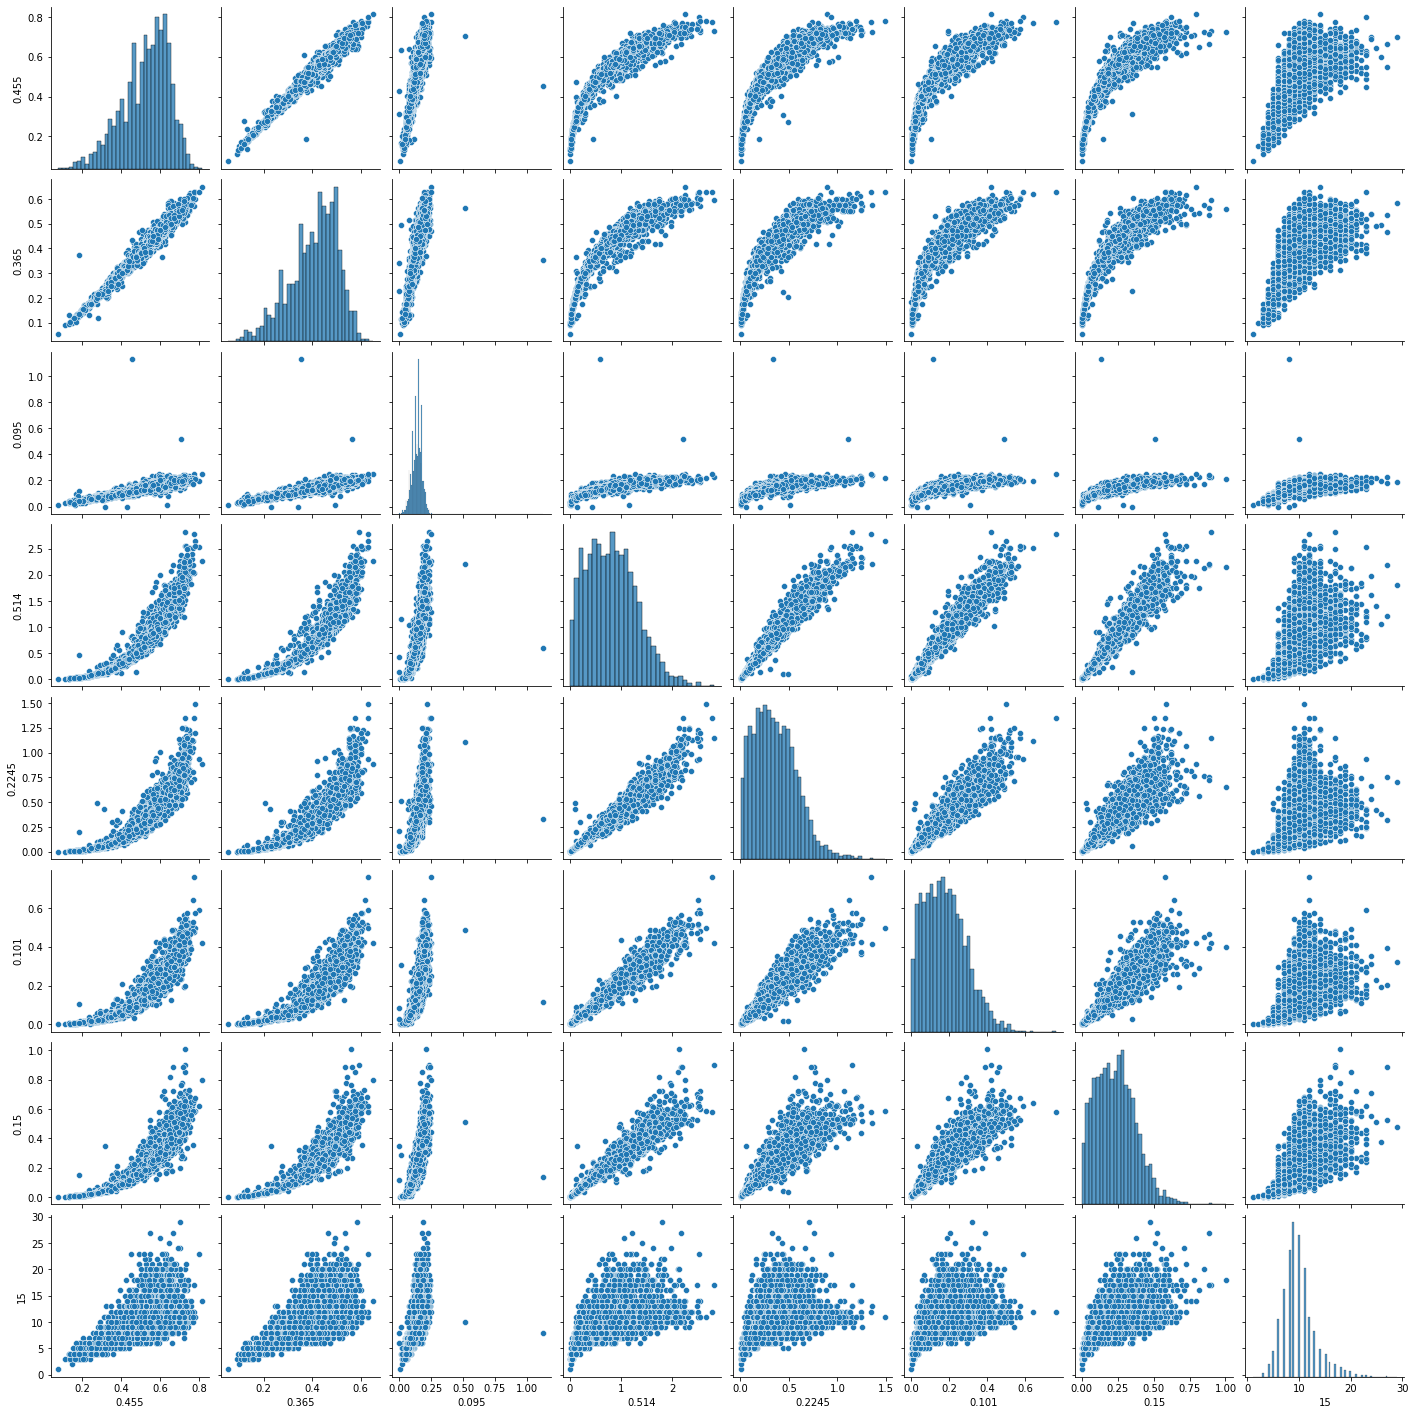

In [ ]:
plt.figure()
sns.pairplot(data=df4)
plt.show()

<Figure size 432x288 with 0 Axes>

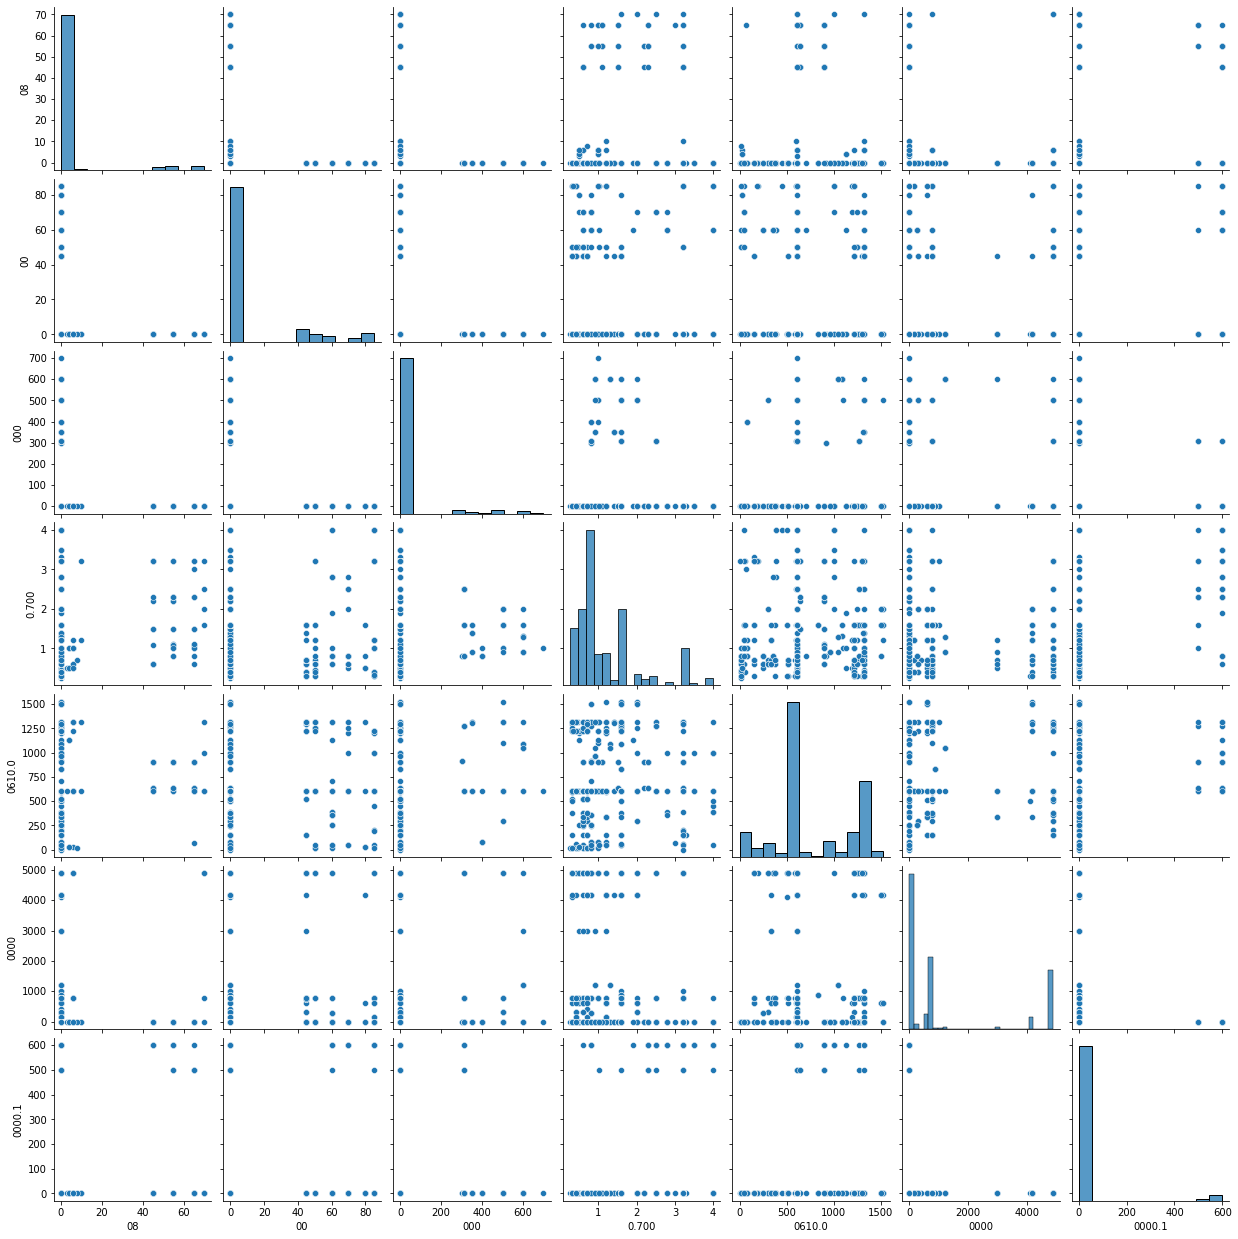

In [ ]:
plt.figure()
sns.pairplot(data=df5)
plt.show()

**3. Line Chart**

Example 1

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


      Name  Grade
0   Marcia   82.4
1   Kadeem   78.2
2     Nash   79.3
3  Noelani   83.2
4  Noelani   87.4


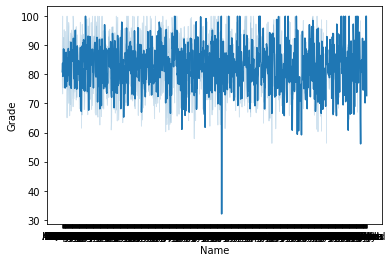

In [ ]:
import pandas as pd
gdata=pd.read_csv("/content/drive/MyDrive/FDS/FDS/smallgradesh.csv")
import seaborn as sns
import matplotlib.pylab as plt


print(gdata.head())
sns.lineplot(data=gdata, x="Name", y="Grade")

Example 2

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
     Fname     Lname Gender Grade  Hours of Study
0     Mary  Ettienne      F     B              16
1  Charles    Looner      M     F               8
2    Betty  Franklin      F     A              24
3    Roger   Withers      M     C               5
4     John   Mulgrew      M     A               5


import pandas as pd
gdata=pd.read_csv("/content/gdrive/MyDrive/FDS/FDS/algebradata.csv")
import seaborn as sns
import matplotlib.pylab as plt

print(gdata.head())
sns.lineplot(data=gdata, x="Grade", y="Hours of Study")

Example 3

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


/
Mounted at /content/gdrive


     Fname      Lname Gender  ...  SalesTraining Years Experience  Cars Sold
0     Jada    Walters      F  ...              N                3          2
1   Nicole  Henderson      F  ...              N                3          6
2    Tanya      Moore      F  ...              Y                4          6
3  Ronelle    Jackson      F  ...              Y                5          3
4     Brad      Sears      M  ...              N                4          2

[5 rows x 7 columns]


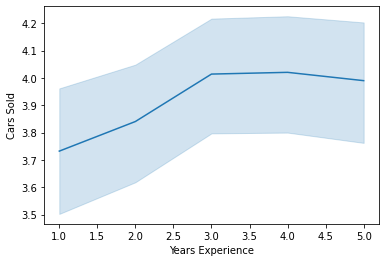

In [ ]:
import pandas as pd
gdata=pd.read_csv("/content/gdrive/MyDrive/FDS/FDS/axisdata.csv")
import seaborn as sns
import matplotlib.pylab as plt


print(gdata.head())
sns.lineplot(data=gdata, x="Years Experience", y="Cars Sold")

Example 4

In [ ]:

%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


            STNAME  ACTIVE  ...     FLDOFF         REGION
0      Connecticut       0  ...   Hartford       New York
1      Connecticut       0  ...   Hartford       New York
2            Maine       0  ...    Concord       New York
3            Maine       0  ...    Concord       New York
4            Maine       0  ...    Concord       New York
...            ...     ...  ...        ...            ...
27593     Colorado       0  ...     Denver         Dallas
27594      Georgia       1  ...    Atlanta        Atlanta
27595     Colorado       0  ...     Denver       New York
27596   New Jersey       0  ...  Jamesburg  San Francisco
27597     Colorado       0  ...     Denver         Dallas

[27598 rows x 12 columns]


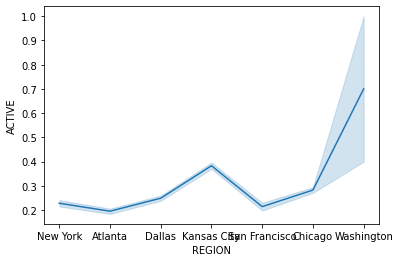

In [ ]:
import pandas as pd
gdata=pd.read_csv("/content/gdrive/MyDrive/FDS/FDS/fdicdata.csv")
import seaborn as sns
import matplotlib.pylab as plt


print(gdata)
sns.lineplot(data=gdata, x="REGION", y="ACTIVE")

Example 5

In [ ]:

%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


          fname  ...                                           address
0        Marcia  ...              7379 Highland Rd. , Dublin, GA 31021
1        Kadeem  ...                8 Bayport St. , Honolulu, HI 96815
2          Nash  ...                 Encino, CA 91316, 3 Lilac Street 
3       Noelani  ...        Riverview, FL 33569, 9998 North Smith Dr. 
4       Noelani  ...         97 SE. Ocean Street , Bethlehem, PA 18015
...         ...  ...                                               ...
1995       Cody  ...              8567 Walnut Street , Piqua, OH 45356
1996  Geraldine  ...                  Lynn, MA 01902, 66 Bridge Drive 
1997   Mercedes  ...       Loxahatchee, FL 33470, 8887 NE. Sugar Road 
1998     Lucius  ...  8734 South Birch Hill Drive , Canfield, OH 44406
1999      Linus  ...            21 Glen Ridge St. , Highland, IN 46322

[2000 rows x 8 columns]


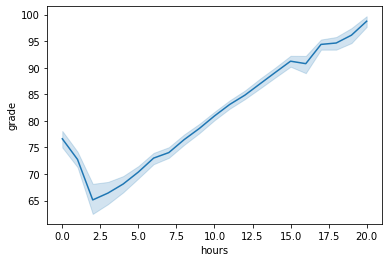

In [ ]:
import pandas as pd
gdata=pd.read_excel("/content/gdrive/MyDrive/FDS/FDS/gradedata2.csv")
import seaborn as sns
import matplotlib.pylab as plt


print(gdata)
sns.lineplot(data=gdata, x="hours", y="grade")

**4. Bar Chart**

# Demonstration on visualization of Bar.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
ex1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
ex2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
ex3 = "https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data"
ex4 = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
ex5 = "https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data"

In [ ]:
df1 = pd.read_csv(ex1)
df2 = pd.read_csv(ex2)
df3 = pd.read_csv(ex3)
df4 = pd.read_csv(ex4)
df5 = pd.read_csv(ex5)

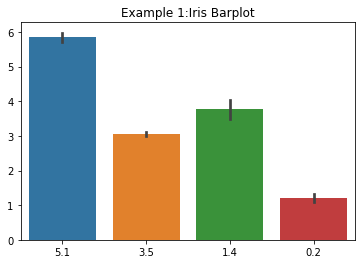

In [ ]:
plt.figure()
plt.title("Example 1:Iris Barplot")
sns.barplot(data=df1)
plt.show()

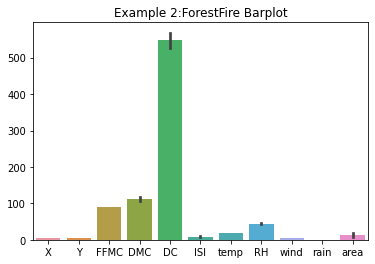

In [ ]:
#****************forestfires***************#
plt.figure()
plt.title("Example 2:ForestFire Barplot")
sns.barplot(data=df2)
plt.show()

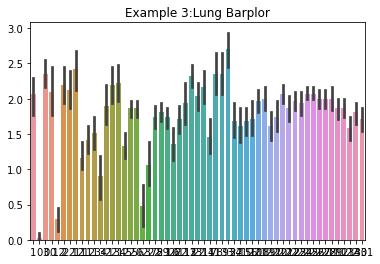

In [ ]:
#****************Lungs***************#
plt.figure()
plt.title("Example 3:Lung Barplor")
sns.barplot(data=df3)
plt.show()

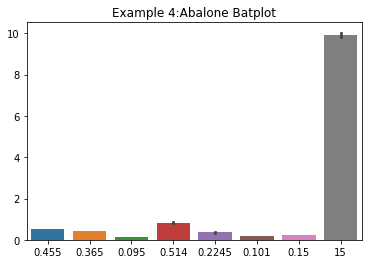

In [ ]:
#****************Abolone***************#
plt.figure()
plt.title("Example 4:Abalone Batplot")
sns.barplot(data=df4)
plt.show()

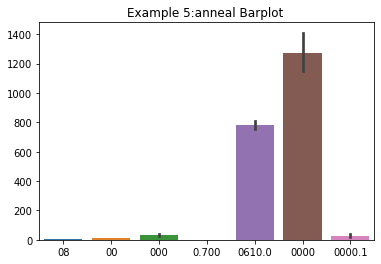

In [ ]:
#****************anneal***************#
plt.figure()
plt.title("Example 5:anneal Barplot ")
sns.barplot(data=df5)
plt.show()

**5. Histogram**


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Fname             999 non-null    object
 1   Lname             999 non-null    object
 2   Gender            999 non-null    object
 3   Hours Worked      999 non-null    int64 
 4   SalesTraining     999 non-null    object
 5   Years Experience  999 non-null    int64 
 6   Cars Sold         999 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB
None

*** Significant Columns ***
Gender
Hours Worked
SalesTraining
Years Experience
Cars Sold

*** Histogram Plot ***


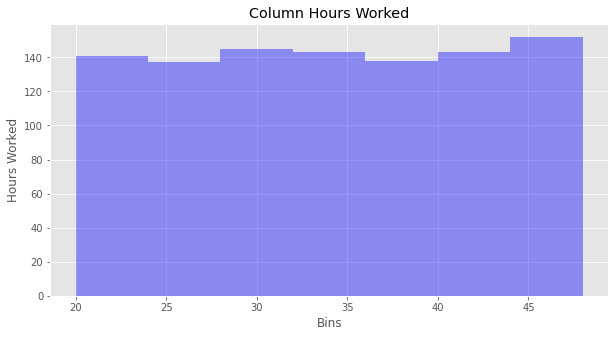

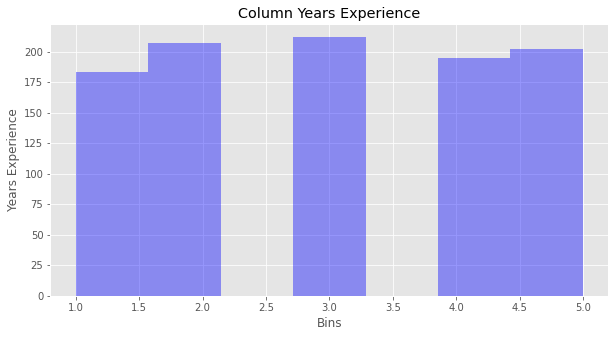

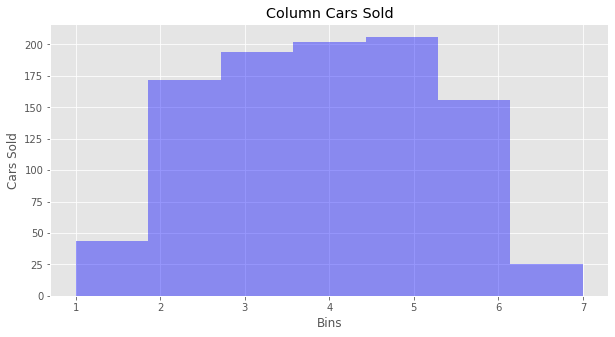

In [ ]:
# Example 1

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

df = pd.read_csv('axisdata.csv')

print("\n*** Structure ***")
print(df.info())


lNSigTerms = ['id', 'name', 'desc']
lsRet = []
vColList = df.columns.to_list()
for vCol in vColList:
    bIsNotSig = False
    for vTerm in lNSigTerms:
        if vCol.lower().startswith(vTerm) or vCol.lower().endswith(vTerm): 
            bIsNotSig = True
    if bIsNotSig == False:
        lsRet.append(vCol) 
# store for future use
lSigCols = lsRet       
dfSigCols = df[lSigCols]
print("\n*** Significant Columns ***")
for vCol in lSigCols:
    print(vCol)



print("\n*** Histogram Plot ***")
for vCol in lSigCols:
    if (df[vCol].dtypes == 'object'): #and df[vCol].dtypes != 'float64' ):
        continue
    #print("Col",vCol)
    colValues = df[vCol].values
    plt.figure(figsize=(10,5))
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title('Column %s' % vCol)
    plt.ylabel(vCol)
    plt.xlabel('Bins')
    plt.show()


**New Section**


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    2000 non-null   object 
 1   Grade   2000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.4+ KB
None

*** Significant Columns ***
Grade

*** Histogram Plot ***


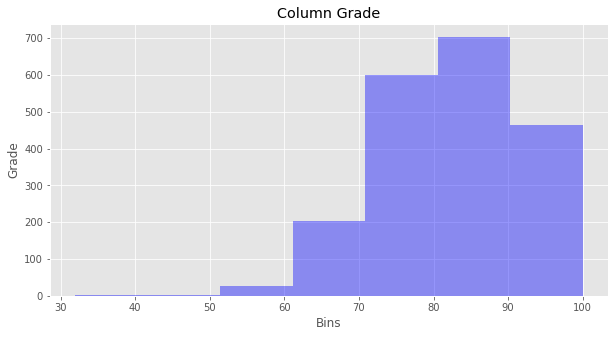

In [ ]:
# Example 2

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

df = pd.read_csv('smallgradesh.csv')

print("\n*** Structure ***")
print(df.info())


lNSigTerms = ['id', 'name', 'desc']
lsRet = []
vColList = df.columns.to_list()
for vCol in vColList:
    bIsNotSig = False
    for vTerm in lNSigTerms:
        if vCol.lower().startswith(vTerm) or vCol.lower().endswith(vTerm): 
            bIsNotSig = True
    if bIsNotSig == False:
        lsRet.append(vCol) 
# store for future use
lSigCols = lsRet       
dfSigCols = df[lSigCols]
print("\n*** Significant Columns ***")
for vCol in lSigCols:
    print(vCol)



print("\n*** Histogram Plot ***")
for vCol in lSigCols:
    if (df[vCol].dtypes == 'object'): #and df[vCol].dtypes != 'float64' ):
        continue
    #print("Col",vCol)
    colValues = df[vCol].values
    plt.figure(figsize=(10,5))
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title('Column %s' % vCol)
    plt.ylabel(vCol)
    plt.xlabel('Bins')
    plt.show()


**New Section**


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fname           999 non-null    object
 1   Lname           999 non-null    object
 2   Gender          999 non-null    object
 3   Grade           999 non-null    object
 4   Hours of Study  999 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 39.1+ KB
None

*** Significant Columns ***
Gender
Grade
Hours of Study

*** Histogram Plot ***


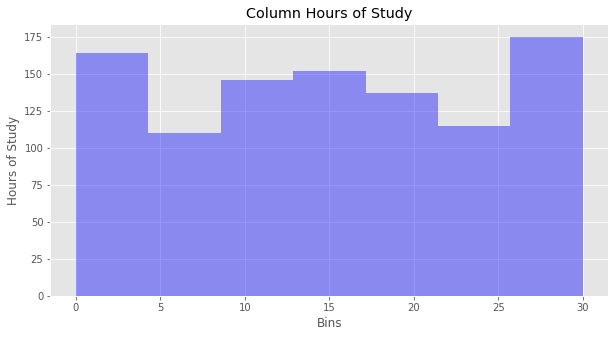

In [ ]:
# Example 3

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

df = pd.read_csv('algebradata.csv')

print("\n*** Structure ***")
print(df.info())


lNSigTerms = ['id', 'name', 'desc']
lsRet = []
vColList = df.columns.to_list()
for vCol in vColList:
    bIsNotSig = False
    for vTerm in lNSigTerms:
        if vCol.lower().startswith(vTerm) or vCol.lower().endswith(vTerm): 
            bIsNotSig = True
    if bIsNotSig == False:
        lsRet.append(vCol) 
# store for future use
lSigCols = lsRet       
dfSigCols = df[lSigCols]
print("\n*** Significant Columns ***")
for vCol in lSigCols:
    print(vCol)



print("\n*** Histogram Plot ***")
for vCol in lSigCols:
    if (df[vCol].dtypes == 'object'): #and df[vCol].dtypes != 'float64' ):
        continue
    #print("Col",vCol)
    colValues = df[vCol].values
    plt.figure(figsize=(10,5))
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title('Column %s' % vCol)
    plt.ylabel(vCol)
    plt.xlabel('Bins')
    plt.show()


**New Section**


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STNAME   27598 non-null  object 
 1   ACTIVE   27598 non-null  int64  
 2   ADDRESS  27598 non-null  object 
 3   ASSET    25696 non-null  object 
 4   CITY     27598 non-null  object 
 5   NAME     27598 non-null  object 
 6   ROA      7307 non-null   float64
 7   ROE      7306 non-null   float64
 8   WEBADDR  27598 non-null  object 
 9   ZIP      27598 non-null  int64  
 10  FLDOFF   27598 non-null  object 
 11  REGION   27598 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 2.5+ MB
None

*** Significant Columns ***
ACTIVE
ADDRESS
ASSET
CITY
ROA
ROE
WEBADDR
ZIP
FLDOFF
REGION

*** Histogram Plot ***


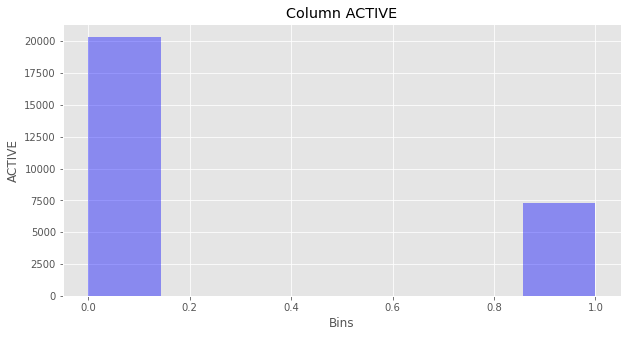

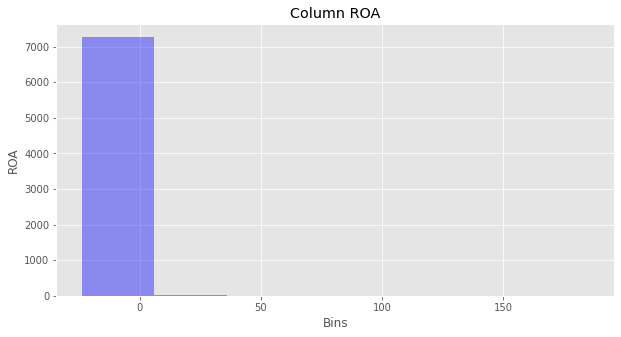

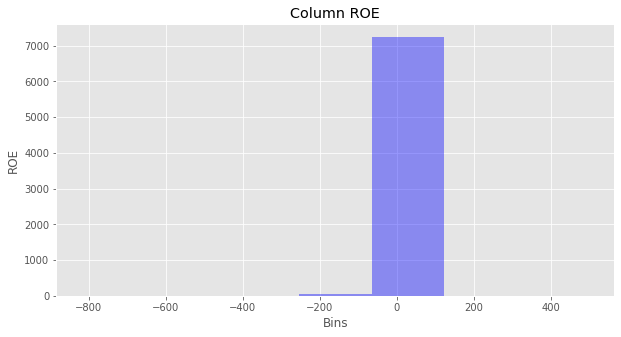

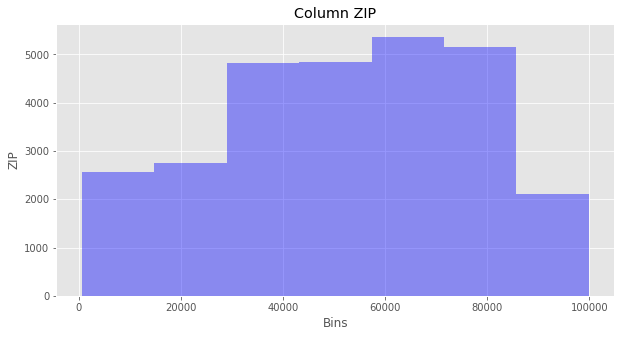

In [ ]:
# Example 4

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

df = pd.read_csv('fdicdata.csv')

print("\n*** Structure ***")
print(df.info())


lNSigTerms = ['id', 'name', 'desc']
lsRet = []
vColList = df.columns.to_list()
for vCol in vColList:
    bIsNotSig = False
    for vTerm in lNSigTerms:
        if vCol.lower().startswith(vTerm) or vCol.lower().endswith(vTerm): 
            bIsNotSig = True
    if bIsNotSig == False:
        lsRet.append(vCol) 
# store for future use
lSigCols = lsRet       
dfSigCols = df[lSigCols]
print("\n*** Significant Columns ***")
for vCol in lSigCols:
    print(vCol)



print("\n*** Histogram Plot ***")
for vCol in lSigCols:
    if (df[vCol].dtypes == 'object'): #and df[vCol].dtypes != 'float64' ):
        continue
    #print("Col",vCol)
    colValues = df[vCol].values
    plt.figure(figsize=(10,5))
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title('Column %s' % vCol)
    plt.ylabel(vCol)
    plt.xlabel('Bins')
    plt.show()


**New Section**


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fname     2000 non-null   object 
 1   lname     2000 non-null   object 
 2   gender    2000 non-null   object 
 3   age       2000 non-null   int64  
 4   exercise  2000 non-null   int64  
 5   hours     2000 non-null   int64  
 6   grade     2000 non-null   float64
 7   address   2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB
None

*** Significant Columns ***
gender
age
exercise
hours
grade
address

*** Histogram Plot ***


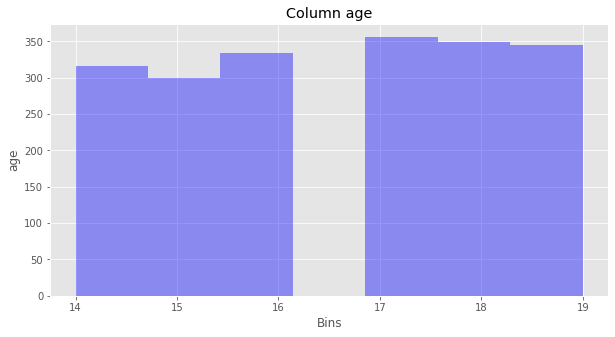

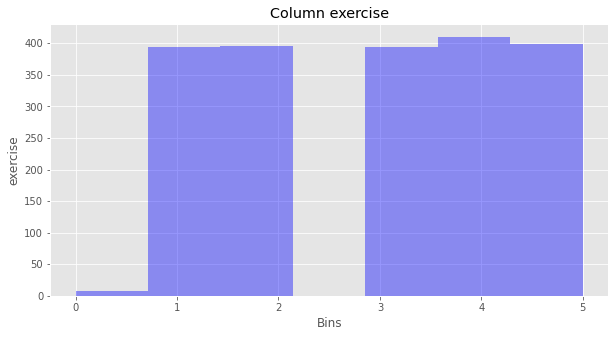

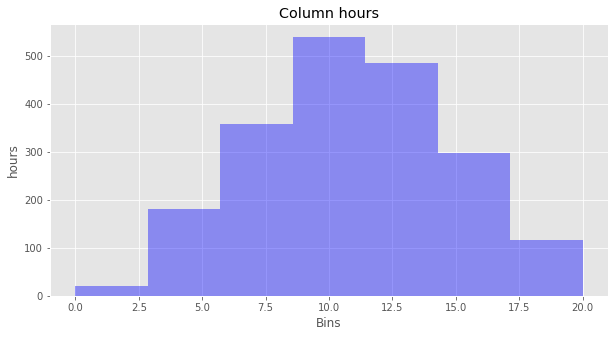

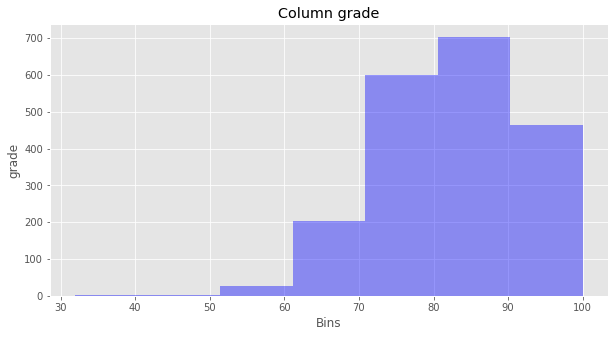

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

df = pd.read_csv('grade2.csv')

print("\n*** Structure ***")
print(df.info())


lNSigTerms = ['id', 'name', 'desc']
lsRet = []
vColList = df.columns.to_list()
for vCol in vColList:
    bIsNotSig = False
    for vTerm in lNSigTerms:
        if vCol.lower().startswith(vTerm) or vCol.lower().endswith(vTerm): 
            bIsNotSig = True
    if bIsNotSig == False:
        lsRet.append(vCol) 
# store for future use
lSigCols = lsRet       
dfSigCols = df[lSigCols]
print("\n*** Significant Columns ***")
for vCol in lSigCols:
    print(vCol)



print("\n*** Histogram Plot ***")
for vCol in lSigCols:
    if (df[vCol].dtypes == 'object'): #and df[vCol].dtypes != 'float64' ):
        continue
    #print("Col",vCol)
    colValues = df[vCol].values
    plt.figure(figsize=(10,5))
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title('Column %s' % vCol)
    plt.ylabel(vCol)
    plt.xlabel('Bins')
    plt.show()


# **Exploratory Data Analysis of Binary and Categorical Variables**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


       Cars       Bikes   SUV     Trucks
0  16.666667  31.666667  40.0  11.666667


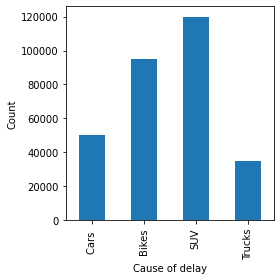

In [ ]:
import pandas as pd
import matplotlib.pylab as plt

dfw = pd.read_csv("/content/drive/MyDrive/hello.csv")
print(100 * dfw / dfw.values.sum())

ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()